### Please ensure the data file is properly loaded before running this file. Please upload the csv file of retail track

In [340]:
# importing necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [341]:
data=pd.read_csv("/content/UrbanEdgeApparel - UrbanEdgeApparel.csv")

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89644 entries, 0 to 89643
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order ID                    89644 non-null  int64  
 1   Order Status                89644 non-null  object 
 2   Order Date                  89493 non-null  object 
 3   Order Day of Week           89493 non-null  object 
 4   Order Month                 89493 non-null  object 
 5   Order Year                  89493 non-null  float64
 6   Customer ID                 89644 non-null  object 
 7   Company ID                  86536 non-null  object 
 8   Product ID                  89644 non-null  object 
 9   Product Variant ID          86200 non-null  object 
 10  Product Unit Selling Price  89644 non-null  float64
 11  Product Quantity            89644 non-null  int64  
 12  Total Selling Price         89644 non-null  float64
 13  Payment Status              896

In [343]:
data.shape

(89644, 21)

In [344]:
data.isnull().sum()

Order ID                         0
Order Status                     0
Order Date                     151
Order Day of Week              151
Order Month                    151
Order Year                     151
Customer ID                      0
Company ID                    3108
Product ID                       0
Product Variant ID            3444
Product Unit Selling Price       0
Product Quantity                 0
Total Selling Price              0
Payment Status                   0
Shipment ID                      0
Shipment Number                  0
Shipping Address Type            0
Shipping City                   37
Shipping State                  90
Shipping Postal Code            37
Shipping Country                37
dtype: int64

In [345]:
#removing pending payment as they may affect the predicted values
df= data[~data['Payment Status'].isin(['Canceled'])]

In [346]:
# Assign integer values to each country
df['Shipping Country Code'] = pd.factorize(df['Shipping Country'])[0]

<ipython-input-346-d91fb470628f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shipping Country Code'] = pd.factorize(df['Shipping Country'])[0]


In [347]:
df.head()

,Order ID,Order Status,Order Date,Order Day of Week,Order Month,Order Year,Customer ID,Company ID,Product ID,Product Variant ID,...,Total Selling Price,Payment Status,Shipment ID,Shipment Number,Shipping Address Type,Shipping City,Shipping State,Shipping Postal Code,Shipping Country,Shipping Country Code
0,104,Completed,6/6/2013,Thursday,June,2013.0,Cust_3161,Company_87239,Prod_5030,Prod_Var_50300,...,215.00,Received,271,271,Business,Washington,District Of Columbia,20011-2343,United States,0
1,104,Completed,6/6/2013,Thursday,June,2013.0,Cust_3161,Company_87239,Prod_70018,Prod_Var_70018,...,75.00,Received,271,271,Business,Washington,District Of Columbia,20011-2343,United States,0
2,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10003,...,3.95,Received,438,438,Business,Lone Tree,Colorado,80124,United States,0
3,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10004,...,3.95,Received,438,438,Business,Lone Tree,Colorado,80124,United States,0
4,107,Completed,6/6/2013,Thursday,June,2013.0,Cust_2040,Company_83024,Prod_1000,Prod_Var_10005,...,7.90,Received,438,438,Business,Lone Tree,Colorado,80124,United States,0


In [348]:
df.iloc[991]

Order ID                                    647
Order Status                          Completed
Order Date                            5/25/2014
Order Day of Week                        Sunday
Order Month                                 May
Order Year                               2014.0
Customer ID                           Cust_2570
Company ID                        Company_89211
Product ID                            Prod_4800
Product Variant ID               Prod_Var_48002
Product Unit Selling Price                  8.0
Product Quantity                              1
Total Selling Price                         8.0
Payment Status                         Received
Shipment ID                                1485
Shipment Number                            1485
Shipping Address Type               Residential
Shipping City                       Rheinfelden
Shipping State                Baden Württemberg
Shipping Postal Code                      79618
Shipping Country                        

In [349]:
df['Payment Status']

0        Received
1        Received
2        Received
3        Received
4        Received
           ...   
89639    Received
89640    Received
89641    Received
89642    Received
89643    Received
Name: Payment Status, Length: 88598, dtype: object

In [350]:
#dropping unnecessary values
df=df.drop('Payment Status',axis=1)
df=df.drop('Order Status',axis=1)
df=df.drop('Order Date',axis=1)
df=df.drop('Order Day of Week',axis=1)
df=df.drop('Order Month',axis=1)
df=df.drop('Product Variant ID',axis=1)
df=df.drop('Shipping Address Type',axis=1)
df=df.drop('Shipping City',axis=1)
df=df.drop('Shipping State',axis=1)
df=df.drop('Shipping Postal Code',axis=1)
df=df.drop('Shipping Country',axis=1)

In [351]:
# Fill missing values with a default value 0
# Some customers don't have company Id they could just be individuals buying
df['Company ID'] = df['Company ID'].fillna('0')

In [352]:
#converting string to int
df['Company ID'] = df['Company ID'].str.extract('(\d+)').astype(int)
df['Customer ID'] = df['Customer ID'].str.extract('(\d+)').astype(int)
df['Product ID'] = df['Product ID'].str.extract('(\d+)').astype(int)

In [353]:
# Drop rows with null values across all columns
df = df.dropna()

In [354]:
df= df[~df['Total Selling Price'].isin(['0'])]

In [355]:
#For the company as a whole
y=df['Total Selling Price']

In [356]:
y.info()

<class 'pandas.core.series.Series'>
Index: 88449 entries, 0 to 89643
Series name: Total Selling Price
Non-Null Count  Dtype  
--------------  -----  
88449 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [357]:
x=df.drop('Total Selling Price',axis=1)

In [358]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88449 entries, 0 to 89643
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order ID                    88449 non-null  int64  
 1   Order Year                  88449 non-null  float64
 2   Customer ID                 88449 non-null  int64  
 3   Company ID                  88449 non-null  int64  
 4   Product ID                  88449 non-null  int64  
 5   Product Unit Selling Price  88449 non-null  float64
 6   Product Quantity            88449 non-null  int64  
 7   Shipment ID                 88449 non-null  int64  
 8   Shipment Number             88449 non-null  int64  
 9   Shipping Country Code       88449 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 7.4 MB


In [359]:
x.head()

,Order ID,Order Year,Customer ID,Company ID,Product ID,Product Unit Selling Price,Product Quantity,Shipment ID,Shipment Number,Shipping Country Code
0,104,2013.0,3161,87239,5030,4.30,50,271,271,0
1,104,2013.0,3161,87239,70018,1.50,50,271,271,0
2,107,2013.0,2040,83024,1000,3.95,1,438,438,0
3,107,2013.0,2040,83024,1000,3.95,1,438,438,0
4,107,2013.0,2040,83024,1000,3.95,2,438,438,0


In [360]:
x.isnull().sum()

Order ID                      0
Order Year                    0
Customer ID                   0
Company ID                    0
Product ID                    0
Product Unit Selling Price    0
Product Quantity              0
Shipment ID                   0
Shipment Number               0
Shipping Country Code         0
dtype: int64

In [361]:
#spliting 80/20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [362]:
y.isnull().sum()

0

In [363]:
y_train.head()

32927      4.5
74917     32.0
47366     60.0
924      108.0
51938     22.0
Name: Total Selling Price, dtype: float64

In [364]:
y_train.dtypes
y_train.unique()

array([  4.5 ,  32.  ,  60.  , ...,   5.82, 704.  , 485.1 ])

In [365]:
# predicting the values
model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(y_pred)

[20.    7.85 50.   ... 25.5  17.5  14.  ]


In [367]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae}")

1.1468665573770551


In [368]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Root mean squared error: {rmse}")

43.97965740572735


In [369]:
#Margin of error
from scipy.stats import norm
n = len(y_pred)
std_dev = np.std(y_pred, ddof=1)
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)
# Calculate the margin of error
margin_of_error = z * (std_dev / np.sqrt(n))
print(f"Margin of Error: {margin_of_error:.2f}")

Margin of Error: 3.34


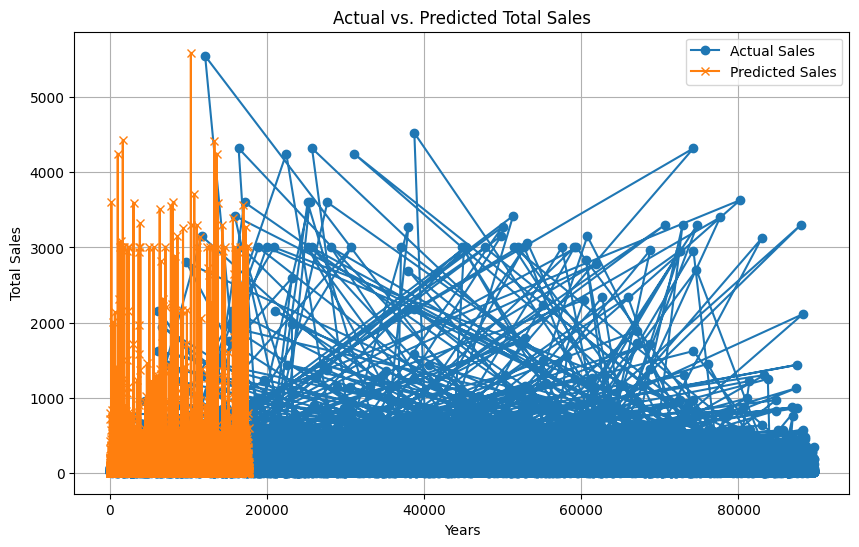

In [321]:
#plotting
actual_sales = y_test
predicted_sales = y_pred

# Plot actual vs. predicted total sales
plt.figure(figsize=(10, 6))
plt.plot(actual_sales, label='Actual Sales', marker='o')  # Plot actual sales
plt.plot(predicted_sales, label='Predicted Sales', marker='x')  # Plot predicted sales
plt.xlabel('Years')  # Add x-axis label (e.g., time periods)
plt.ylabel('Total Sales')  # Add y-axis label
plt.title('Actual vs. Predicted Total Sales')  # Add plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines
plt.show()

In [323]:
#For each product ID
y=df['Product ID']

In [324]:
x=df.drop('Product ID',axis=1)

In [325]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88449 entries, 0 to 89643
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order ID                    88449 non-null  int64  
 1   Order Year                  88449 non-null  float64
 2   Customer ID                 88449 non-null  int64  
 3   Company ID                  88449 non-null  int64  
 4   Product Unit Selling Price  88449 non-null  float64
 5   Product Quantity            88449 non-null  int64  
 6   Total Selling Price         88449 non-null  float64
 7   Shipment ID                 88449 non-null  int64  
 8   Shipment Number             88449 non-null  int64  
 9   Shipping Country Code       88449 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 7.4 MB


In [332]:
#spliting 80/20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [327]:
# predicting the values
model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(y_pred)

[19040.92285714  8910.75333333  3756.54       ...  5060.
  3510.          6286.71      ]


In [328]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae}")

3356.9832976173357


In [329]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Root mean squared error: {rmse}")

10745.038610287564


In [ ]:
#Margin of error
from scipy.stats import norm
n = len(y_pred)
std_dev = np.std(y_pred, ddof=1)
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)
# Calculate the margin of error
margin_of_error = z * (std_dev / np.sqrt(n))
print(f"Margin of Error: {margin_of_error:.2f}")

In [330]:
#For each company ID
y=df['Company ID']

In [331]:
x=df.drop('Company ID',axis=1)

In [336]:
#spliting 80/20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [337]:
# predicting the values
model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(y_pred)

[23721.  43754.  45730.  ... 31925.  20002.1 69379. ]


In [335]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae}")

1228.0203080836632


In [338]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Root mean squared error: {rmse}")

3972.2855624142717


In [ ]:
#Margin of error
from scipy.stats import norm
n = len(y_pred)
std_dev = np.std(y_pred, ddof=1)
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)
# Calculate the margin of error
margin_of_error = z * (std_dev / np.sqrt(n))
print(f"Margin of Error: {margin_of_error:.2f}")

In [339]:
#For each country
y=df['Shipping Country Code']
x=df.drop('Shipping Country Code',axis=1)
#spliting 80/20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# predicting the values
model = RandomForestRegressor(n_estimators=100)

model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(y_pred)
#accuracy
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae}")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Root mean squared error: {rmse}")
#Margin of error
from scipy.stats import norm
n = len(y_pred)
std_dev = np.std(y_pred, ddof=1)
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)
# Calculate the margin of error
margin_of_error = z * (std_dev / np.sqrt(n))
print(f"Margin of Error: {margin_of_error:.2f}")

[0. 0. 0. ... 0. 0. 6.]
0.020975127190503106
0.28981853350487596
